# Stage A Codes

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#import data
data = pd.read_csv('fuel_ferc1.csv')

In [4]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
#checking for duplicates
data.duplicated().any()

False

In [9]:
list(data.columns)

['record_id',
 'utility_id_ferc1',
 'report_year',
 'plant_name_ferc1',
 'fuel_type_code_pudl',
 'fuel_unit',
 'fuel_qty_burned',
 'fuel_mmbtu_per_unit',
 'fuel_cost_per_unit_burned',
 'fuel_cost_per_unit_delivered',
 'fuel_cost_per_mmbtu']

(800, 1400)

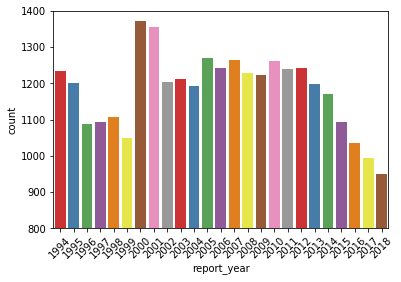

In [20]:
chart1 = sns.countplot(x = 'report_year', data = data, palette='Set1')

chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)

plt.ylim([800,1400])

[Text(0, 0, 'coal'),
 Text(0, 0, 'gas'),
 Text(0, 0, 'nuclear'),
 Text(0, 0, 'oil'),
 Text(0, 0, 'waste'),
 Text(0, 0, 'other')]

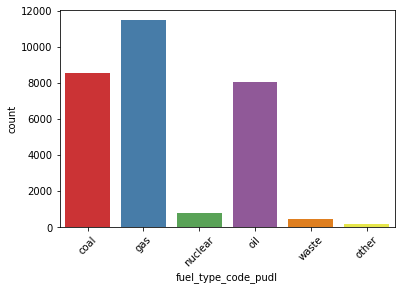

In [22]:
# fuel type code with the lowest representation: ANSWER IS OTHER


chart1 = sns.countplot(x = 'fuel_type_code_pudl', data = data, palette='Set1')

chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)



## fuel type code with the lowest representation: ANSWER IS OTHER

#### The Quiz portal recorded it as wrong

In [23]:
# fuel type code with the lowest representation: ANSWER IS OTHER

data['fuel_type_code_pudl'].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

## Description of data to answer multiple questions

In [5]:

data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


## Kurtosis and Skewness

In [25]:

data['fuel_qty_burned'].kurtosis()

651.3694501337732

In [26]:
data['fuel_qty_burned'].skew()

15.851495469109503

## Calculation of percentage of missing data

In [33]:
pd.isnull(data).any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [32]:
pd.isnull(data).sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [37]:
data.shape

(29523, 11)

In [36]:
x = data.shape

(180/x[0])*100

0.609694136774718

## Detecting lowest correlation Score

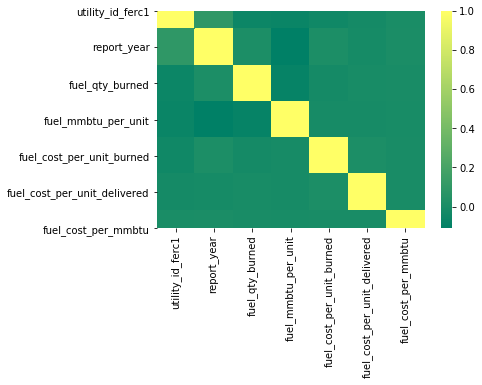

In [98]:
corrData = data.corr()

sns.heatmap(corrData, cmap='summer')

In [44]:
corrData

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [45]:
corrData['fuel_cost_per_unit_burned'].nlargest()

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
Name: fuel_cost_per_unit_burned, dtype: float64

## Percentage Change

In [46]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [51]:
Coal_1994 = data[(data['fuel_type_code_pudl']=='coal') & (data['report_year']==1994)]

In [52]:
Coal_1998 = data[(data['fuel_type_code_pudl']=='coal') & (data['report_year']==1998)]

In [69]:
fcp_98 = Coal_1998['fuel_cost_per_unit_burned'].sum()
fcp_94 = Coal_1994['fuel_cost_per_unit_burned'].sum()

((fcp_98-fcp_94)/fcp_94)*100

-20.56765451826053

## Maximum Average fuel_cost_per_unit_delivered

In [79]:
data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

In [83]:
question10 = pd.DataFrame(data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean())

In [85]:
question10.max()

fuel_cost_per_unit_delivered    11140.197239
dtype: float64

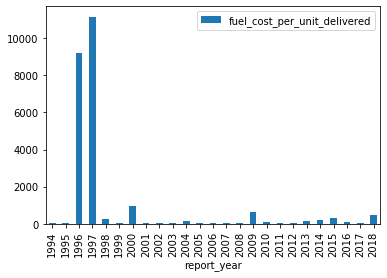

In [95]:
question10.plot(kind = 'bar')